In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv('customer_data.csv', encoding='utf8') #reading the dataset

In [30]:
df.head() #viewing first five records of the dataset

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [31]:
df.shape #showing the rows and columns

(1000, 8)

In [32]:
df.isnull().any() #checking for null values

name                  False
age                   False
gender                False
education             False
income                False
country               False
purchase_frequency    False
spending              False
dtype: bool

In [33]:
df = df[['income', 'spending']]

In [34]:
df.head()

,income,spending
0,53936,13227.120
1,82468,12674.040
2,56941,5354.115
3,60651,2606.510
4,81884,18984.780


<AxesSubplot:xlabel='income', ylabel='Count'>

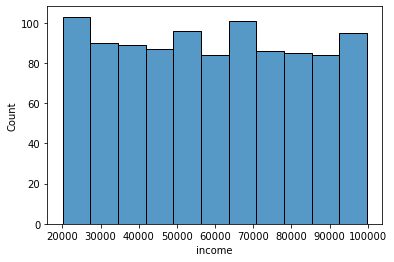

In [62]:
sns.histplot(df['income'])

<AxesSubplot:xlabel='spending', ylabel='Count'>

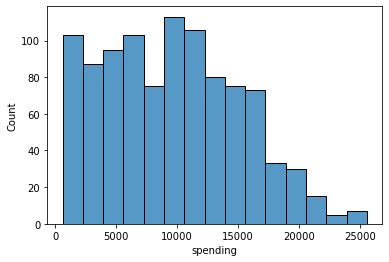

In [63]:
sns.histplot(df['spending'])

In [35]:
x = df.values

In [36]:
x

array([[53936.   , 13227.12 ],
       [82468.   , 12674.04 ],
       [56941.   ,  5354.115],
       ...,
       [59808.   ,  7196.16 ],
       [58272.   , 13939.52 ],
       [32512.   ,  8312.8  ]])

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc_x = StandardScaler()

x = sc_x.fit_transform(x)

In [59]:
x

array([[-0.22978925,  0.6592205 ],
       [ 0.99756538,  0.55832966],
       [-0.10052384, -0.77694449],
       ...,
       [ 0.02280526, -0.44092533],
       [-0.04326851,  0.78917392],
       [-1.15138063, -0.23723191]])

In [39]:
from sklearn.cluster import KMeans

In [40]:
wcss = []

for i in range(1, 11):
    
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [41]:
wcss

[1999.9999999999993,
 1229.9890164343908,
 790.1205558801757,
 544.3847988252899,
 452.0110841464592,
 375.1099229230028,
 315.878453878865,
 271.1621565593944,
 237.78410463576873,
 216.6056101434551]

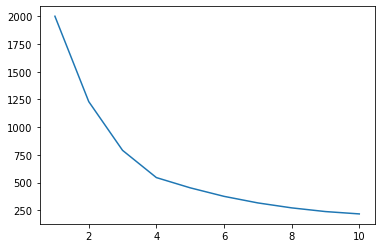

In [42]:
plt.plot(range(1, 11), wcss)

In [43]:
kmeans = KMeans(n_clusters=4, init='k-means++')

y_kmeans = kmeans.fit_predict(x)

In [44]:
y_kmeans

array([2, 3, 0, 1, 3, 3, 3, 0, 1, 2, 3, 3, 2, 1, 1, 0, 0, 0, 1, 3, 3, 0,
       0, 0, 3, 0, 2, 0, 0, 2, 1, 3, 0, 0, 3, 0, 3, 1, 2, 1, 3, 1, 0, 3,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 0, 2, 0, 3, 1, 1, 2,
       1, 2, 1, 0, 1, 3, 2, 1, 2, 1, 2, 1, 3, 3, 1, 1, 2, 1, 0, 1, 3, 3,
       2, 3, 0, 2, 3, 0, 2, 1, 1, 1, 0, 2, 3, 1, 1, 2, 3, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 0, 1, 0, 1, 1, 3, 3, 0, 0, 0, 0, 3, 2, 3, 2, 2, 0, 1,
       0, 3, 2, 0, 3, 2, 0, 0, 2, 1, 2, 0, 1, 3, 3, 0, 2, 3, 3, 1, 0, 2,
       0, 0, 1, 3, 3, 1, 1, 1, 1, 0, 2, 3, 3, 2, 0, 0, 3, 2, 1, 0, 1, 0,
       3, 0, 3, 3, 0, 1, 3, 1, 2, 2, 0, 0, 2, 2, 3, 0, 2, 1, 3, 1, 2, 0,
       1, 3, 1, 3, 2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0, 3, 1, 0,
       1, 2, 1, 2, 3, 3, 0, 3, 0, 3, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 3,
       3, 3, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 3,
       2, 0, 3, 3, 0, 3, 0, 0, 1, 2, 2, 3, 1, 2, 0, 3, 3, 0, 2, 1, 1, 1,
       0, 2, 0, 0, 3, 1, 0, 1, 1, 2, 2, 0, 3, 2, 1,

Text(0, 0.5, 'SPENDING AMOUNT OF CUSTOMERS')

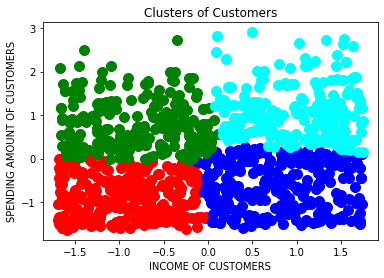

In [65]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Cluster-3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster-4')

plt.title('Clusters of Customers')
plt.xlabel('INCOME OF CUSTOMERS')
plt.ylabel('SPENDING AMOUNT OF CUSTOMERS')

In [46]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(x, method="complete", metric="euclidean")

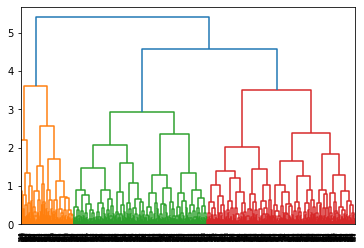

In [47]:
dendrogram(complete_clustering)
plt.show()

In [56]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

<function matplotlib.pyplot.show(close=None, block=None)>

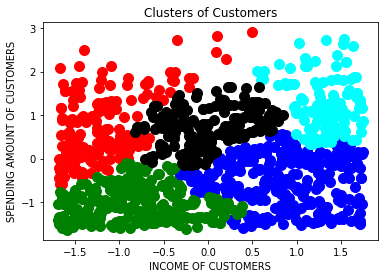

In [66]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s=100, c='red', label='Cluster-1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s=100, c='blue', label='Cluster-2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s=100, c='green', label='Cluster-3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s=100, c='cyan', label='Cluster-4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s=100, c='black', label='Cluster-4')
plt.title('Clusters of Customers')
plt.xlabel('INCOME OF CUSTOMERS')
plt.ylabel('SPENDING AMOUNT OF CUSTOMERS')
plt.show